
# **COURSERA DATA SCRAPPING**


In [1]:
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google_play_scraper import app
from google_play_scraper import Sort, reviews_all

import pandas as pd
import numpy as np

In [3]:
reviews = reviews_all(
    'org.coursera.android',
    country = 'in',
    sort=Sort.NEWEST
)

In [4]:
df1 = pd.DataFrame(np.array(reviews),columns=['review'])
df1 = df1.join(pd.DataFrame(df1.pop('review').tolist()))

In [5]:
df1 = df1.rename(columns = {'content' : 'review',
                     'score' : 'rating',
                     'thumbsUpCount' : 'helpfulCount',
                     'at' : 'date' })

In [6]:
df1.head()

,reviewId,userName,userImage,review,rating,helpfulCount,reviewCreatedVersion,date,replyContent,repliedAt
0,b1b577e7-cafb-430a-af34-6444648559b5,Kondri Swapna,https://play-lh.googleusercontent.com/a/AEdFTp...,good,5,0,3.39.0,2022-12-06 12:56:57,None,NaT
1,f73bd3c7-0866-47f0-b18b-8e25b467ce3b,Jazari Love,https://play-lh.googleusercontent.com/a-/AD5-W...,Awesome,5,0,3.40.1,2022-12-06 12:04:49,None,NaT
2,de7aa517-4ab5-4c3e-893a-d09428e0d7ce,f h,https://play-lh.googleusercontent.com/a/AEdFTp...,"Terrible. App keeps crashing and when it ""prop...",1,0,3.40.1,2022-12-06 11:42:51,None,NaT
3,d8b3a63b-854c-4c3e-88ca-9500f3b82e8d,jerry simon,https://play-lh.googleusercontent.com/a/AEdFTp...,Very insightful learning app. Coursera is a go...,5,0,3.40.1,2022-12-06 10:53:37,None,NaT
4,89b52e6b-d23f-4fc3-8889-3a09ae6f0770,Anas Abdullah Al-Ward,https://play-lh.googleusercontent.com/a-/AD5-W...,"Great, no bugs anymore.",5,1,3.40.1,2022-12-06 10:51:15,None,NaT


In [7]:
df1.shape

(19449, 10)

In [8]:
df1.to_csv("rawdata_coursersa_reviews.csv",index=False)

In [9]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sns # plotting
import matplotlib.pyplot as plt # plotting
%matplotlib inline
import os # accessing directory structure

#NLP processing imports
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
#from stop_words import get_stop_words
import re
import spacy

# **FETCHING data from 1st april 2019 to 31 march 2022**

In [10]:
df1['date'] = pd.to_datetime(df1['date'])

In [11]:
start_date = '2019-04-01 00:00:01'
end_date = '2022-03-31 11:59:00'

In [12]:
mask = (df1['date'] > start_date) & (df1['date'] <= end_date)
  
df2 = df1.loc[mask]


In [13]:
df2.head()

,reviewId,userName,userImage,review,rating,helpfulCount,reviewCreatedVersion,date,replyContent,repliedAt
2284,2115aa5f-14b4-45de-b72b-c0dd8f02cbb0,Merlita Rose Jamiro,https://play-lh.googleusercontent.com/a-/AD5-W...,I dont know why this app is not working proper...,1,0,3.30.3,2022-03-30 20:54:42,None,NaT
2285,0c5e654a-8bf6-4169-b0bb-f6ba77a27306,Evanschukwuebuka Nzenwa,https://play-lh.googleusercontent.com/a-/AD5-W...,Fantastic experience so far. But there's an is...,4,7,3.30.3,2022-03-30 14:34:48,None,NaT
2286,4a464414-4579-4e6c-8b54-362a92beef7c,Shivam Mishra,https://play-lh.googleusercontent.com/a-/AD5-W...,I have completed my project management certifi...,1,2,3.29.0,2022-03-30 06:27:33,None,NaT
2287,49ec1d27-8366-4024-a802-4527f6038b7b,K R.,https://play-lh.googleusercontent.com/a-/AD5-W...,No dark mode. It is so sad.,1,0,3.30.3,2022-03-29 22:37:39,None,NaT
2288,53eab9a9-9cdf-4eea-906b-6085827e71f5,Dr.Hussein Mossa Moafaa,https://play-lh.googleusercontent.com/a-/AD5-W...,We need to download videos,2,0,None,2022-03-29 21:18:46,None,NaT


In [14]:
df2.shape

(7531, 10)

In [15]:
df2.to_csv("courseranreviews19-22.csv",index=False)

In [16]:
pd.set_option('display.max_colwidth', -1)


<ipython-input-16-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [17]:
df2.head()


,reviewId,userName,userImage,review,rating,helpfulCount,reviewCreatedVersion,date,replyContent,repliedAt
2284,2115aa5f-14b4-45de-b72b-c0dd8f02cbb0,Merlita Rose Jamiro,https://play-lh.googleusercontent.com/a-/AD5-WCnko7sJggLl7rsvVwn5NTO1xEG4jNgGQsH3bZLpzd4,I dont know why this app is not working properly. Videos are not playing. Pls help,1,0,3.30.3,2022-03-30 20:54:42,None,NaT
2285,0c5e654a-8bf6-4169-b0bb-f6ba77a27306,Evanschukwuebuka Nzenwa,https://play-lh.googleusercontent.com/a-/AD5-WCnF98rR0MxmmZHksvjAzHeMV6UoZ5iLjRBlv3OumpY,Fantastic experience so far. But there's an issue I think should be worked on. I am a student on financial aid but each time I do a timed assignment on my system and want to submit a pop-up telling me to pay for the course comes up and that makes it impossible for me to submit on time and my time runs out. I feel since I am already on scholarship I shouldn't still be asked to pay for the course and thereby hindering me from submitting an assignment. Please address this issue.,4,7,3.30.3,2022-03-30 14:34:48,None,NaT
2286,4a464414-4579-4e6c-8b54-362a92beef7c,Shivam Mishra,https://play-lh.googleusercontent.com/a-/AD5-WCmqiZ2Tiesv2RhgcCuLwu5bJuv7ONfXx9S6MLZM,"I have completed my project management certificate but it is not giving me my certificate, it is showing verify ID. What should I do?",1,2,3.29.0,2022-03-30 06:27:33,None,NaT
2287,49ec1d27-8366-4024-a802-4527f6038b7b,K R.,https://play-lh.googleusercontent.com/a-/AD5-WCnfvz0jtY5RY6QWZdECuOfsgYwkPS3sD2JMj7jcOA,No dark mode. It is so sad.,1,0,3.30.3,2022-03-29 22:37:39,None,NaT
2288,53eab9a9-9cdf-4eea-906b-6085827e71f5,Dr.Hussein Mossa Moafaa,https://play-lh.googleusercontent.com/a-/AD5-WCnq24igAuFRrqWGSjvzc94Ek0870IA1hlLTJ1kQ,We need to download videos,2,0,None,2022-03-29 21:18:46,None,NaT


In [18]:
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 7531 rows and 10 columns


In [19]:
df2.dtypes


reviewId                object        
userName                object        
userImage               object        
review                  object        
rating                  int64         
helpfulCount            int64         
reviewCreatedVersion    object        
date                    datetime64[ns]
replyContent            object        
repliedAt               datetime64[ns]
dtype: object

In [20]:
df2["review"] = df2["review"].astype(str)


<ipython-input-20-9689a44714f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["review"] = df2["review"].astype(str)


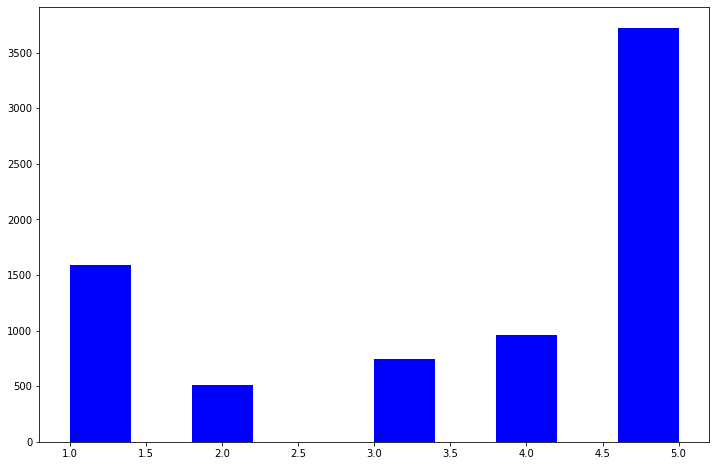

In [21]:
fig = plt.figure(figsize=(12,8))
plt.hist(df2['rating'], color='blue')
plt.show()

In [22]:
df2['rating'].value_counts()


5    3724
1    1590
4    960 
3    743 
2    514 
Name: rating, dtype: int64

# **cleaning**

In [23]:
def remove_urls(review):
    url_pattern = re.compile(r'https?://\S+|www\.\S+|@[^\s]+')
    return url_pattern.sub(r'', review)

In [24]:
df2["textclean"] = df2["review"].apply(lambda review: remove_urls(review))


<ipython-input-24-a84c30b1c425>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["textclean"] = df2["review"].apply(lambda review: remove_urls(review))


# **sentiment analysis**

In [25]:
###Vader Sentiment
#To install vaderSentiment
!pip install vaderSentiment 
from vaderSentiment import vaderSentiment
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
sent_analyser = SentimentIntensityAnalyzer()
def sentiment(text):
    return (sent_analyser.polarity_scores(text)["compound"])

In [27]:
df2["Polarity"] = df2["textclean"].apply(sentiment)


<ipython-input-27-8693f4ceb6af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Polarity"] = df2["textclean"].apply(sentiment)


In [28]:
df2.head()


,reviewId,userName,userImage,review,rating,helpfulCount,reviewCreatedVersion,date,replyContent,repliedAt,textclean,Polarity
2284,2115aa5f-14b4-45de-b72b-c0dd8f02cbb0,Merlita Rose Jamiro,https://play-lh.googleusercontent.com/a-/AD5-WCnko7sJggLl7rsvVwn5NTO1xEG4jNgGQsH3bZLpzd4,I dont know why this app is not working properly. Videos are not playing. Pls help,1,0,3.30.3,2022-03-30 20:54:42,None,NaT,I dont know why this app is not working properly. Videos are not playing. Pls help,-0.4717
2285,0c5e654a-8bf6-4169-b0bb-f6ba77a27306,Evanschukwuebuka Nzenwa,https://play-lh.googleusercontent.com/a-/AD5-WCnF98rR0MxmmZHksvjAzHeMV6UoZ5iLjRBlv3OumpY,Fantastic experience so far. But there's an issue I think should be worked on. I am a student on financial aid but each time I do a timed assignment on my system and want to submit a pop-up telling me to pay for the course comes up and that makes it impossible for me to submit on time and my time runs out. I feel since I am already on scholarship I shouldn't still be asked to pay for the course and thereby hindering me from submitting an assignment. Please address this issue.,4,7,3.30.3,2022-03-30 14:34:48,None,NaT,Fantastic experience so far. But there's an issue I think should be worked on. I am a student on financial aid but each time I do a timed assignment on my system and want to submit a pop-up telling me to pay for the course comes up and that makes it impossible for me to submit on time and my time runs out. I feel since I am already on scholarship I shouldn't still be asked to pay for the course and thereby hindering me from submitting an assignment. Please address this issue.,0.2960
2286,4a464414-4579-4e6c-8b54-362a92beef7c,Shivam Mishra,https://play-lh.googleusercontent.com/a-/AD5-WCmqiZ2Tiesv2RhgcCuLwu5bJuv7ONfXx9S6MLZM,"I have completed my project management certificate but it is not giving me my certificate, it is showing verify ID. What should I do?",1,2,3.29.0,2022-03-30 06:27:33,None,NaT,"I have completed my project management certificate but it is not giving me my certificate, it is showing verify ID. What should I do?",-0.3724
2287,49ec1d27-8366-4024-a802-4527f6038b7b,K R.,https://play-lh.googleusercontent.com/a-/AD5-WCnfvz0jtY5RY6QWZdECuOfsgYwkPS3sD2JMj7jcOA,No dark mode. It is so sad.,1,0,3.30.3,2022-03-29 22:37:39,None,NaT,No dark mode. It is so sad.,-0.7344
2288,53eab9a9-9cdf-4eea-906b-6085827e71f5,Dr.Hussein Mossa Moafaa,https://play-lh.googleusercontent.com/a-/AD5-WCnq24igAuFRrqWGSjvzc94Ek0870IA1hlLTJ1kQ,We need to download videos,2,0,None,2022-03-29 21:18:46,None,NaT,We need to download videos,0.0000


In [29]:
def senti(df2):
    if df2['Polarity'] >= 0.05:
        val = "Positive"
    elif df2['Polarity'] <= -0.05:
        val = "Negative"
    else:
        val = "Neutral"
    return val

In [30]:
df2['Sentiment'] = df2.apply(senti, axis=1)


<ipython-input-30-24bf9a51f4c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Sentiment'] = df2.apply(senti, axis=1)


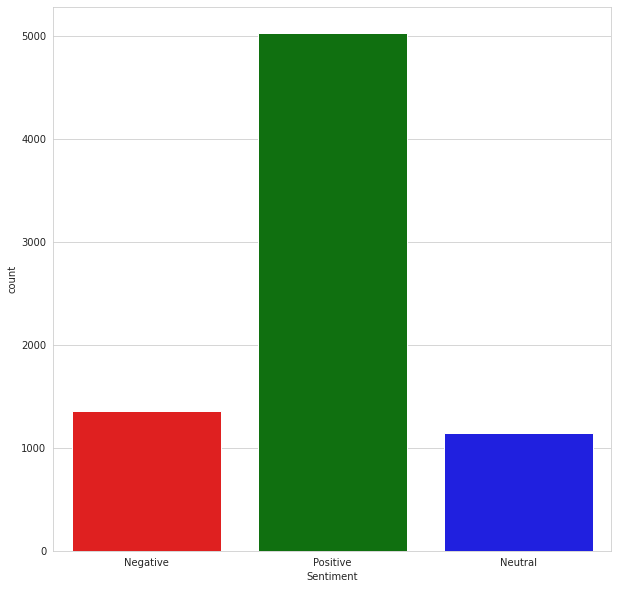

In [31]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment", data=df2, 
                  palette=dict(Neutral="blue", Positive="Green", Negative="Red"))


# **Aspect based sentiment analysis** 


In [32]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [33]:
def pos(text):
    doc = nlp(text)
    # You want list of Verb tokens 
    aspects = [token.text for token in doc if token.pos_ == "NOUN"]
    return aspects

In [34]:
df2["Aspects"] = df2["textclean"].apply(pos)


<ipython-input-34-c171c2e78766>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Aspects"] = df2["textclean"].apply(pos)


In [35]:
df2.head()


,reviewId,userName,userImage,review,rating,helpfulCount,reviewCreatedVersion,date,replyContent,repliedAt,textclean,Polarity,Sentiment,Aspects
2284,2115aa5f-14b4-45de-b72b-c0dd8f02cbb0,Merlita Rose Jamiro,https://play-lh.googleusercontent.com/a-/AD5-WCnko7sJggLl7rsvVwn5NTO1xEG4jNgGQsH3bZLpzd4,I dont know why this app is not working properly. Videos are not playing. Pls help,1,0,3.30.3,2022-03-30 20:54:42,None,NaT,I dont know why this app is not working properly. Videos are not playing. Pls help,-0.4717,Negative,"[app, Videos]"
2285,0c5e654a-8bf6-4169-b0bb-f6ba77a27306,Evanschukwuebuka Nzenwa,https://play-lh.googleusercontent.com/a-/AD5-WCnF98rR0MxmmZHksvjAzHeMV6UoZ5iLjRBlv3OumpY,Fantastic experience so far. But there's an issue I think should be worked on. I am a student on financial aid but each time I do a timed assignment on my system and want to submit a pop-up telling me to pay for the course comes up and that makes it impossible for me to submit on time and my time runs out. I feel since I am already on scholarship I shouldn't still be asked to pay for the course and thereby hindering me from submitting an assignment. Please address this issue.,4,7,3.30.3,2022-03-30 14:34:48,None,NaT,Fantastic experience so far. But there's an issue I think should be worked on. I am a student on financial aid but each time I do a timed assignment on my system and want to submit a pop-up telling me to pay for the course comes up and that makes it impossible for me to submit on time and my time runs out. I feel since I am already on scholarship I shouldn't still be asked to pay for the course and thereby hindering me from submitting an assignment. Please address this issue.,0.2960,Positive,"[experience, issue, student, aid, time, assignment, system, pop, course, time, time, scholarship, course, assignment, issue]"
2286,4a464414-4579-4e6c-8b54-362a92beef7c,Shivam Mishra,https://play-lh.googleusercontent.com/a-/AD5-WCmqiZ2Tiesv2RhgcCuLwu5bJuv7ONfXx9S6MLZM,"I have completed my project management certificate but it is not giving me my certificate, it is showing verify ID. What should I do?",1,2,3.29.0,2022-03-30 06:27:33,None,NaT,"I have completed my project management certificate but it is not giving me my certificate, it is showing verify ID. What should I do?",-0.3724,Negative,"[project, management, certificate, certificate]"
2287,49ec1d27-8366-4024-a802-4527f6038b7b,K R.,https://play-lh.googleusercontent.com/a-/AD5-WCnfvz0jtY5RY6QWZdECuOfsgYwkPS3sD2JMj7jcOA,No dark mode. It is so sad.,1,0,3.30.3,2022-03-29 22:37:39,None,NaT,No dark mode. It is so sad.,-0.7344,Negative,[mode]
2288,53eab9a9-9cdf-4eea-906b-6085827e71f5,Dr.Hussein Mossa Moafaa,https://play-lh.googleusercontent.com/a-/AD5-WCnq24igAuFRrqWGSjvzc94Ek0870IA1hlLTJ1kQ,We need to download videos,2,0,None,2022-03-29 21:18:46,None,NaT,We need to download videos,0.0000,Neutral,[videos]


In [36]:
df2['aspectliststring'] = df2.Aspects.apply(lambda x: ', '.join([str(i) for i in x]))


<ipython-input-36-f19aea9bdbab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['aspectliststring'] = df2.Aspects.apply(lambda x: ', '.join([str(i) for i in x]))


In [37]:
df2.head()

,reviewId,userName,userImage,review,rating,helpfulCount,reviewCreatedVersion,date,replyContent,repliedAt,textclean,Polarity,Sentiment,Aspects,aspectliststring
2284,2115aa5f-14b4-45de-b72b-c0dd8f02cbb0,Merlita Rose Jamiro,https://play-lh.googleusercontent.com/a-/AD5-WCnko7sJggLl7rsvVwn5NTO1xEG4jNgGQsH3bZLpzd4,I dont know why this app is not working properly. Videos are not playing. Pls help,1,0,3.30.3,2022-03-30 20:54:42,None,NaT,I dont know why this app is not working properly. Videos are not playing. Pls help,-0.4717,Negative,"[app, Videos]","app, Videos"
2285,0c5e654a-8bf6-4169-b0bb-f6ba77a27306,Evanschukwuebuka Nzenwa,https://play-lh.googleusercontent.com/a-/AD5-WCnF98rR0MxmmZHksvjAzHeMV6UoZ5iLjRBlv3OumpY,Fantastic experience so far. But there's an issue I think should be worked on. I am a student on financial aid but each time I do a timed assignment on my system and want to submit a pop-up telling me to pay for the course comes up and that makes it impossible for me to submit on time and my time runs out. I feel since I am already on scholarship I shouldn't still be asked to pay for the course and thereby hindering me from submitting an assignment. Please address this issue.,4,7,3.30.3,2022-03-30 14:34:48,None,NaT,Fantastic experience so far. But there's an issue I think should be worked on. I am a student on financial aid but each time I do a timed assignment on my system and want to submit a pop-up telling me to pay for the course comes up and that makes it impossible for me to submit on time and my time runs out. I feel since I am already on scholarship I shouldn't still be asked to pay for the course and thereby hindering me from submitting an assignment. Please address this issue.,0.2960,Positive,"[experience, issue, student, aid, time, assignment, system, pop, course, time, time, scholarship, course, assignment, issue]","experience, issue, student, aid, time, assignment, system, pop, course, time, time, scholarship, course, assignment, issue"
2286,4a464414-4579-4e6c-8b54-362a92beef7c,Shivam Mishra,https://play-lh.googleusercontent.com/a-/AD5-WCmqiZ2Tiesv2RhgcCuLwu5bJuv7ONfXx9S6MLZM,"I have completed my project management certificate but it is not giving me my certificate, it is showing verify ID. What should I do?",1,2,3.29.0,2022-03-30 06:27:33,None,NaT,"I have completed my project management certificate but it is not giving me my certificate, it is showing verify ID. What should I do?",-0.3724,Negative,"[project, management, certificate, certificate]","project, management, certificate, certificate"
2287,49ec1d27-8366-4024-a802-4527f6038b7b,K R.,https://play-lh.googleusercontent.com/a-/AD5-WCnfvz0jtY5RY6QWZdECuOfsgYwkPS3sD2JMj7jcOA,No dark mode. It is so sad.,1,0,3.30.3,2022-03-29 22:37:39,None,NaT,No dark mode. It is so sad.,-0.7344,Negative,[mode],mode
2288,53eab9a9-9cdf-4eea-906b-6085827e71f5,Dr.Hussein Mossa Moafaa,https://play-lh.googleusercontent.com/a-/AD5-WCnq24igAuFRrqWGSjvzc94Ek0870IA1hlLTJ1kQ,We need to download videos,2,0,None,2022-03-29 21:18:46,None,NaT,We need to download videos,0.0000,Neutral,[videos],videos


# **stemming**

In [38]:
# import these modules
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
  
ps = PorterStemmer()

In [39]:
t=[]
for w in (df2['aspectliststring']):
    #print(w, " : ", ps.stem(w))
    k = ps.stem(w)
    #er = ps.stem(w)
    t.append(k)
t[:15]

['app, video',
 'experience, issue, student, aid, time, assignment, system, pop, course, time, time, scholarship, course, assignment, issu',
 'project, management, certificate, certif',
 'mode',
 'video',
 'scammers, course, results, emplyer, course, assignments, grade, certificate, students, course, submissions, support, team, thing, wait, month, year',
 'app, purposes, websit',
 '',
 '',
 'job, stud',
 'way, mode, top',
 'app, field, alot',
 'interface, car',
 '',
 'application, waste, time, courses, homepage, troubleshooting, laptop, option, troubleshooting, app, flexibility, course, subscription, pag']

In [40]:
df2['stemextracted'] = t 

<ipython-input-40-d1d45afd905a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['stemextracted'] = t


In [41]:
df2.head()

,reviewId,userName,userImage,review,rating,helpfulCount,reviewCreatedVersion,date,replyContent,repliedAt,textclean,Polarity,Sentiment,Aspects,aspectliststring,stemextracted
2284,2115aa5f-14b4-45de-b72b-c0dd8f02cbb0,Merlita Rose Jamiro,https://play-lh.googleusercontent.com/a-/AD5-WCnko7sJggLl7rsvVwn5NTO1xEG4jNgGQsH3bZLpzd4,I dont know why this app is not working properly. Videos are not playing. Pls help,1,0,3.30.3,2022-03-30 20:54:42,None,NaT,I dont know why this app is not working properly. Videos are not playing. Pls help,-0.4717,Negative,"[app, Videos]","app, Videos","app, video"
2285,0c5e654a-8bf6-4169-b0bb-f6ba77a27306,Evanschukwuebuka Nzenwa,https://play-lh.googleusercontent.com/a-/AD5-WCnF98rR0MxmmZHksvjAzHeMV6UoZ5iLjRBlv3OumpY,Fantastic experience so far. But there's an issue I think should be worked on. I am a student on financial aid but each time I do a timed assignment on my system and want to submit a pop-up telling me to pay for the course comes up and that makes it impossible for me to submit on time and my time runs out. I feel since I am already on scholarship I shouldn't still be asked to pay for the course and thereby hindering me from submitting an assignment. Please address this issue.,4,7,3.30.3,2022-03-30 14:34:48,None,NaT,Fantastic experience so far. But there's an issue I think should be worked on. I am a student on financial aid but each time I do a timed assignment on my system and want to submit a pop-up telling me to pay for the course comes up and that makes it impossible for me to submit on time and my time runs out. I feel since I am already on scholarship I shouldn't still be asked to pay for the course and thereby hindering me from submitting an assignment. Please address this issue.,0.2960,Positive,"[experience, issue, student, aid, time, assignment, system, pop, course, time, time, scholarship, course, assignment, issue]","experience, issue, student, aid, time, assignment, system, pop, course, time, time, scholarship, course, assignment, issue","experience, issue, student, aid, time, assignment, system, pop, course, time, time, scholarship, course, assignment, issu"
2286,4a464414-4579-4e6c-8b54-362a92beef7c,Shivam Mishra,https://play-lh.googleusercontent.com/a-/AD5-WCmqiZ2Tiesv2RhgcCuLwu5bJuv7ONfXx9S6MLZM,"I have completed my project management certificate but it is not giving me my certificate, it is showing verify ID. What should I do?",1,2,3.29.0,2022-03-30 06:27:33,None,NaT,"I have completed my project management certificate but it is not giving me my certificate, it is showing verify ID. What should I do?",-0.3724,Negative,"[project, management, certificate, certificate]","project, management, certificate, certificate","project, management, certificate, certif"
2287,49ec1d27-8366-4024-a802-4527f6038b7b,K R.,https://play-lh.googleusercontent.com/a-/AD5-WCnfvz0jtY5RY6QWZdECuOfsgYwkPS3sD2JMj7jcOA,No dark mode. It is so sad.,1,0,3.30.3,2022-03-29 22:37:39,None,NaT,No dark mode. It is so sad.,-0.7344,Negative,[mode],mode,mode
2288,53eab9a9-9cdf-4eea-906b-6085827e71f5,Dr.Hussein Mossa Moafaa,https://play-lh.googleusercontent.com/a-/AD5-WCnq24igAuFRrqWGSjvzc94Ek0870IA1hlLTJ1kQ,We need to download videos,2,0,None,2022-03-29 21:18:46,None,NaT,We need to download videos,0.0000,Neutral,[videos],videos,video


In [42]:
import nltk


In [43]:
top_N = 100 #top 100 words


In [44]:
word_dist = nltk.FreqDist(df2['stemextracted'])
top100_words = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

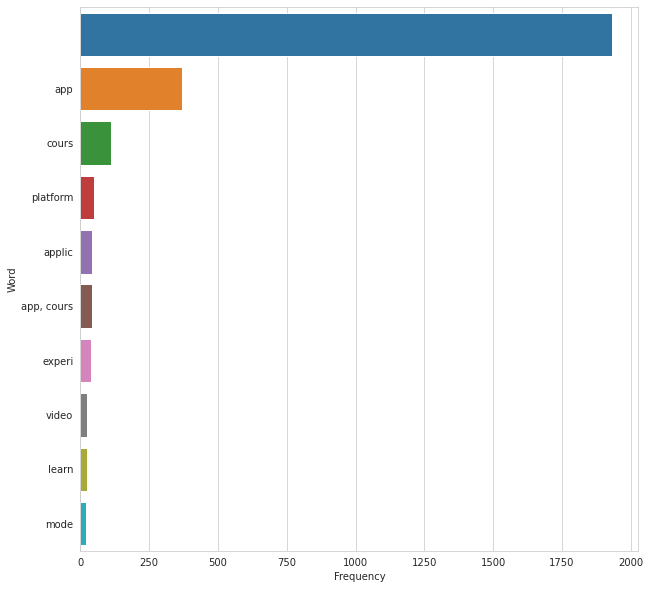

In [45]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Frequency",y="Word", data=top100_words.head(10))

In [46]:
df2['dict'] = None

<ipython-input-46-d18692b9415e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['dict'] = None


In [47]:
df2.reset_index(inplace = True,drop = True)



In [48]:
dt = {}
Lst = []
for i in range (len(df2)):
    tmp = {}
    if pd.notnull (df2.stemextracted[i]): 
        for wrd in df2.stemextracted[i].split(','):
            if wrd.strip() in Lst:
                dt[wrd.strip()] += 1
            else:
                dt[wrd.strip()] = 1
                Lst.append(wrd.strip())
            
            tmp[wrd.strip()] = dt[wrd.strip()]

    df2['dict'][i]=tmp.copy()


    #data ['dict'][i] = dt.copy()

<ipython-input-48-4df7343ecf83>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['dict'][i]=tmp.copy()


In [49]:
df2.head()

,reviewId,userName,userImage,review,rating,helpfulCount,reviewCreatedVersion,date,replyContent,repliedAt,textclean,Polarity,Sentiment,Aspects,aspectliststring,stemextracted,dict
0,2115aa5f-14b4-45de-b72b-c0dd8f02cbb0,Merlita Rose Jamiro,https://play-lh.googleusercontent.com/a-/AD5-WCnko7sJggLl7rsvVwn5NTO1xEG4jNgGQsH3bZLpzd4,I dont know why this app is not working properly. Videos are not playing. Pls help,1,0,3.30.3,2022-03-30 20:54:42,None,NaT,I dont know why this app is not working properly. Videos are not playing. Pls help,-0.4717,Negative,"[app, Videos]","app, Videos","app, video","{'app': 1, 'video': 1}"
1,0c5e654a-8bf6-4169-b0bb-f6ba77a27306,Evanschukwuebuka Nzenwa,https://play-lh.googleusercontent.com/a-/AD5-WCnF98rR0MxmmZHksvjAzHeMV6UoZ5iLjRBlv3OumpY,Fantastic experience so far. But there's an issue I think should be worked on. I am a student on financial aid but each time I do a timed assignment on my system and want to submit a pop-up telling me to pay for the course comes up and that makes it impossible for me to submit on time and my time runs out. I feel since I am already on scholarship I shouldn't still be asked to pay for the course and thereby hindering me from submitting an assignment. Please address this issue.,4,7,3.30.3,2022-03-30 14:34:48,None,NaT,Fantastic experience so far. But there's an issue I think should be worked on. I am a student on financial aid but each time I do a timed assignment on my system and want to submit a pop-up telling me to pay for the course comes up and that makes it impossible for me to submit on time and my time runs out. I feel since I am already on scholarship I shouldn't still be asked to pay for the course and thereby hindering me from submitting an assignment. Please address this issue.,0.2960,Positive,"[experience, issue, student, aid, time, assignment, system, pop, course, time, time, scholarship, course, assignment, issue]","experience, issue, student, aid, time, assignment, system, pop, course, time, time, scholarship, course, assignment, issue","experience, issue, student, aid, time, assignment, system, pop, course, time, time, scholarship, course, assignment, issu","{'experience': 1, 'issue': 1, 'student': 1, 'aid': 1, 'time': 3, 'assignment': 2, 'system': 1, 'pop': 1, 'course': 2, 'scholarship': 1, 'issu': 1}"
2,4a464414-4579-4e6c-8b54-362a92beef7c,Shivam Mishra,https://play-lh.googleusercontent.com/a-/AD5-WCmqiZ2Tiesv2RhgcCuLwu5bJuv7ONfXx9S6MLZM,"I have completed my project management certificate but it is not giving me my certificate, it is showing verify ID. What should I do?",1,2,3.29.0,2022-03-30 06:27:33,None,NaT,"I have completed my project management certificate but it is not giving me my certificate, it is showing verify ID. What should I do?",-0.3724,Negative,"[project, management, certificate, certificate]","project, management, certificate, certificate","project, management, certificate, certif","{'project': 1, 'management': 1, 'certificate': 1, 'certif': 1}"
3,49ec1d27-8366-4024-a802-4527f6038b7b,K R.,https://play-lh.googleusercontent.com/a-/AD5-WCnfvz0jtY5RY6QWZdECuOfsgYwkPS3sD2JMj7jcOA,No dark mode. It is so sad.,1,0,3.30.3,2022-03-29 22:37:39,None,NaT,No dark mode. It is so sad.,-0.7344,Negative,[mode],mode,mode,{'mode': 1}
4,53eab9a9-9cdf-4eea-906b-6085827e71f5,Dr.Hussein Mossa Moafaa,https://play-lh.googleusercontent.com/a-/AD5-WCnq24igAuFRrqWGSjvzc94Ek0870IA1hlLTJ1kQ,We need to download videos,2,0,None,2022-03-29 21:18:46,None,NaT,We need to download videos,0.0000,Neutral,[videos],videos,video,{'video': 2}


In [50]:
dt

{'app': 2709,
 'video': 461,
 'experience': 160,
 'issue': 90,
 'student': 26,
 'aid': 54,
 'time': 289,
 'assignment': 132,
 'system': 36,
 'pop': 9,
 'course': 711,
 'scholarship': 4,
 'issu': 90,
 'project': 21,
 'management': 11,
 'certificate': 187,
 'certif': 80,
 'mode': 129,
 'scammers': 1,
 'results': 9,
 'emplyer': 1,
 'assignments': 78,
 'grade': 11,
 'students': 64,
 'submissions': 1,
 'support': 103,
 'team': 55,
 'thing': 67,
 'wait': 3,
 'month': 41,
 'year': 26,
 'purposes': 2,
 'websit': 29,
 '': 1932,
 'job': 35,
 'stud': 33,
 'way': 126,
 'top': 20,
 'field': 21,
 'alot': 27,
 'interface': 39,
 'car': 9,
 'application': 143,
 'waste': 26,
 'courses': 700,
 'homepage': 4,
 'troubleshooting': 4,
 'laptop': 59,
 'option': 176,
 'flexibility': 2,
 'subscription': 61,
 'pag': 11,
 'button': 66,
 'website': 134,
 'screen': 131,
 'lot': 191,
 'world': 65,
 '👊': 2,
 '✌': 6,
 'point': 33,
 'exercises': 8,
 'desktop': 53,
 'cancel': 1,
 'i': 34,
 'd': 14,
 'camera': 39,
 'perm

In [51]:
pd.DataFrame(dt.items())

,0,1
0,app,2709
1,video,461
2,experience,160
3,issue,90
4,student,26
...,...,...
3081,quid,1
3082,mom,1
3083,accounting,1
3084,quip,1


In [52]:
a = pd.DataFrame(dt.items())

In [53]:
a.to_csv('editeedfreqaspectcounting19-22.csv')


In [54]:
aspect = 'app'
df2[aspect] = 0

<ipython-input-54-f9bb35a57e86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[aspect] = 0


In [55]:
for i in range(len(df2)): 
    count = 0
    if pd.notnull(df2.stemextracted[i]):
        for wrd in df2.stemextracted[i].split(','): 
            if wrd.strip()==aspect.strip():
              count+=1

    df2[aspect][i] = count

<ipython-input-55-436deb3cebd3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[aspect][i] = count


In [56]:
df2.head()

,reviewId,userName,userImage,review,rating,helpfulCount,reviewCreatedVersion,date,replyContent,repliedAt,textclean,Polarity,Sentiment,Aspects,aspectliststring,stemextracted,dict,app
0,2115aa5f-14b4-45de-b72b-c0dd8f02cbb0,Merlita Rose Jamiro,https://play-lh.googleusercontent.com/a-/AD5-WCnko7sJggLl7rsvVwn5NTO1xEG4jNgGQsH3bZLpzd4,I dont know why this app is not working properly. Videos are not playing. Pls help,1,0,3.30.3,2022-03-30 20:54:42,None,NaT,I dont know why this app is not working properly. Videos are not playing. Pls help,-0.4717,Negative,"[app, Videos]","app, Videos","app, video","{'app': 1, 'video': 1}",1
1,0c5e654a-8bf6-4169-b0bb-f6ba77a27306,Evanschukwuebuka Nzenwa,https://play-lh.googleusercontent.com/a-/AD5-WCnF98rR0MxmmZHksvjAzHeMV6UoZ5iLjRBlv3OumpY,Fantastic experience so far. But there's an issue I think should be worked on. I am a student on financial aid but each time I do a timed assignment on my system and want to submit a pop-up telling me to pay for the course comes up and that makes it impossible for me to submit on time and my time runs out. I feel since I am already on scholarship I shouldn't still be asked to pay for the course and thereby hindering me from submitting an assignment. Please address this issue.,4,7,3.30.3,2022-03-30 14:34:48,None,NaT,Fantastic experience so far. But there's an issue I think should be worked on. I am a student on financial aid but each time I do a timed assignment on my system and want to submit a pop-up telling me to pay for the course comes up and that makes it impossible for me to submit on time and my time runs out. I feel since I am already on scholarship I shouldn't still be asked to pay for the course and thereby hindering me from submitting an assignment. Please address this issue.,0.2960,Positive,"[experience, issue, student, aid, time, assignment, system, pop, course, time, time, scholarship, course, assignment, issue]","experience, issue, student, aid, time, assignment, system, pop, course, time, time, scholarship, course, assignment, issue","experience, issue, student, aid, time, assignment, system, pop, course, time, time, scholarship, course, assignment, issu","{'experience': 1, 'issue': 1, 'student': 1, 'aid': 1, 'time': 3, 'assignment': 2, 'system': 1, 'pop': 1, 'course': 2, 'scholarship': 1, 'issu': 1}",0
2,4a464414-4579-4e6c-8b54-362a92beef7c,Shivam Mishra,https://play-lh.googleusercontent.com/a-/AD5-WCmqiZ2Tiesv2RhgcCuLwu5bJuv7ONfXx9S6MLZM,"I have completed my project management certificate but it is not giving me my certificate, it is showing verify ID. What should I do?",1,2,3.29.0,2022-03-30 06:27:33,None,NaT,"I have completed my project management certificate but it is not giving me my certificate, it is showing verify ID. What should I do?",-0.3724,Negative,"[project, management, certificate, certificate]","project, management, certificate, certificate","project, management, certificate, certif","{'project': 1, 'management': 1, 'certificate': 1, 'certif': 1}",0
3,49ec1d27-8366-4024-a802-4527f6038b7b,K R.,https://play-lh.googleusercontent.com/a-/AD5-WCnfvz0jtY5RY6QWZdECuOfsgYwkPS3sD2JMj7jcOA,No dark mode. It is so sad.,1,0,3.30.3,2022-03-29 22:37:39,None,NaT,No dark mode. It is so sad.,-0.7344,Negative,[mode],mode,mode,{'mode': 1},0
4,53eab9a9-9cdf-4eea-906b-6085827e71f5,Dr.Hussein Mossa Moafaa,https://play-lh.googleusercontent.com/a-/AD5-WCnq24igAuFRrqWGSjvzc94Ek0870IA1hlLTJ1kQ,We need to download videos,2,0,None,2022-03-29 21:18:46,None,NaT,We need to download videos,0.0000,Neutral,[videos],videos,video,{'video': 2},0


In [57]:
df2.to_csv('finale_aspectperappcountsubmission1.csv')


# **analysis of positive and negative review data per week**

In [58]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sns # plotting
import matplotlib.pyplot as plt # plotting
%matplotlib inline


In [59]:
data = pd.read_csv('finale_aspectperappcountsubmission1.csv', skiprows=[1])

In [60]:
data.head(2)


,Unnamed: 0,reviewId,userName,userImage,review,rating,helpfulCount,reviewCreatedVersion,date,replyContent,repliedAt,textclean,Polarity,Sentiment,Aspects,aspectliststring,stemextracted,dict,app
0,1,0c5e654a-8bf6-4169-b0bb-f6ba77a27306,Evanschukwuebuka Nzenwa,https://play-lh.googleusercontent.com/a-/AD5-WCnF98rR0MxmmZHksvjAzHeMV6UoZ5iLjRBlv3OumpY,Fantastic experience so far. But there's an issue I think should be worked on. I am a student on financial aid but each time I do a timed assignment on my system and want to submit a pop-up telling me to pay for the course comes up and that makes it impossible for me to submit on time and my time runs out. I feel since I am already on scholarship I shouldn't still be asked to pay for the course and thereby hindering me from submitting an assignment. Please address this issue.,4,7,3.30.3,2022-03-30 14:34:48,NaN,NaN,Fantastic experience so far. But there's an issue I think should be worked on. I am a student on financial aid but each time I do a timed assignment on my system and want to submit a pop-up telling me to pay for the course comes up and that makes it impossible for me to submit on time and my time runs out. I feel since I am already on scholarship I shouldn't still be asked to pay for the course and thereby hindering me from submitting an assignment. Please address this issue.,0.2960,Positive,"['experience', 'issue', 'student', 'aid', 'time', 'assignment', 'system', 'pop', 'course', 'time', 'time', 'scholarship', 'course', 'assignment', 'issue']","experience, issue, student, aid, time, assignment, system, pop, course, time, time, scholarship, course, assignment, issue","experience, issue, student, aid, time, assignment, system, pop, course, time, time, scholarship, course, assignment, issu","{'experience': 1, 'issue': 1, 'student': 1, 'aid': 1, 'time': 3, 'assignment': 2, 'system': 1, 'pop': 1, 'course': 2, 'scholarship': 1, 'issu': 1}",0
1,2,4a464414-4579-4e6c-8b54-362a92beef7c,Shivam Mishra,https://play-lh.googleusercontent.com/a-/AD5-WCmqiZ2Tiesv2RhgcCuLwu5bJuv7ONfXx9S6MLZM,"I have completed my project management certificate but it is not giving me my certificate, it is showing verify ID. What should I do?",1,2,3.29.0,2022-03-30 06:27:33,NaN,NaN,"I have completed my project management certificate but it is not giving me my certificate, it is showing verify ID. What should I do?",-0.3724,Negative,"['project', 'management', 'certificate', 'certificate']","project, management, certificate, certificate","project, management, certificate, certif","{'project': 1, 'management': 1, 'certificate': 1, 'certif': 1}",0


In [61]:
data.shape

(7530, 19)

In [62]:
df3 = pd.DataFrame(data.loc[(data['app']>0) & (data['Sentiment'] == 'Positive')])


In [63]:
df4 = pd.DataFrame(data.loc[(data['app']>0) & (data['Sentiment'] == 'Negative')])


# **analysis of positive review on basis of app and date**

In [64]:
from datetime import datetime 


In [65]:
df3["date"] = pd.to_datetime(df3["date"])

In [66]:
df_sampled1 = df3.set_index('date').resample('7D').mean().reset_index() 
x = df_sampled1['date']
y = df_sampled1['app']

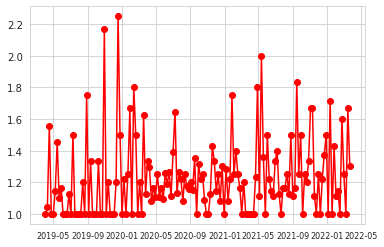

In [67]:
import matplotlib.pyplot as plt 

plt.plot(x,y, color='red', marker='o')
plt.tick_params(axis='x', which='major', labelsize=8)


plt.show()

In [68]:
from wordcloud import WordCloud 


# word column on aspect(stem extracted) of positive review data

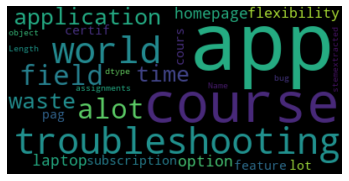

In [69]:
# Start with one review:
#df2['polarerrity_extracted'] = df2['polarerrity_extracted'].astype(str)
text = df3.stemextracted

#text = text.astype(str)
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **analysis of negative  review on basis of app and date**

In [70]:
df4["date"] = pd.to_datetime(df4["date"])

In [71]:
df_sampled2 = df4.set_index('date').resample('7D').mean().reset_index() 
x = df_sampled2['date']
y = df_sampled2["app"]


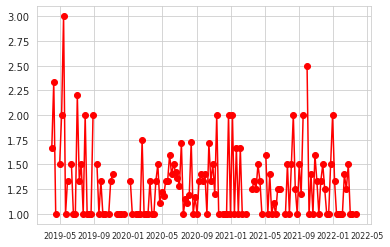

In [72]:
import matplotlib.pyplot as plt 

plt.plot(x,y, color='red', marker='o')
plt.plot()
plt.tick_params(axis='x', which='major', labelsize=8)


plt.show()

# word column on aspect(stem extracted) of negative review data

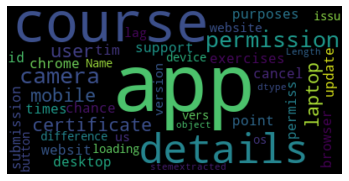

In [73]:
# Start with one review:
#df2['polarerrity_extracted'] = df2['polarerrity_extracted'].astype(str)
text = df4.stemextracted

#text = text.astype(str)
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [74]:
x = df_sampled2['date']
y = df_sampled2["app"]
z = df_sampled1['app']

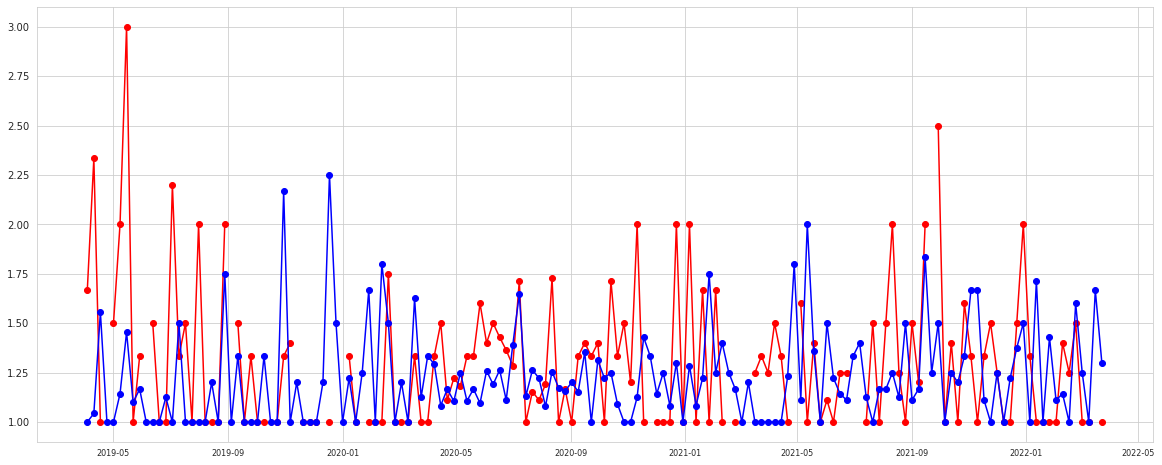

In [75]:
plt.figure(figsize=(20,8))
plt.plot(x,y, color='r', marker='o')
plt.plot(x,z, color='b', marker='o')
plt.plot()
plt.tick_params(axis='x', which='major', labelsize=8)


plt.show()

Red line plot colour shows analysis for negative data ,whereas blue line plot colour shows analysis for positive data

# **Negative and Positive count review per week**

In [76]:
datan = data.groupby("Sentiment").get_group("Negative")


In [77]:
#convert date column to datetime and subtract one week
datan['date'] = pd.to_datetime(datan['date']) - pd.to_timedelta(7, unit='d')

<ipython-input-77-7f1a64d82637>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datan['date'] = pd.to_datetime(datan['date']) - pd.to_timedelta(7, unit='d')


In [78]:
datancnt = pd.DataFrame(datan.groupby([pd.Grouper(key='date', freq='W')])['Sentiment'].count())


## Negative review count per week

In [79]:
datancnt

,Sentiment
date,
2019-03-31,8
2019-04-07,8
2019-04-14,4
2019-04-21,1
2019-04-28,8
...,...
2022-02-27,12
2022-03-06,4
2022-03-13,6


In [80]:
datap = data.groupby("Sentiment").get_group("Positive")


In [81]:
#convert date column to datetime and subtract one week
datap['date'] = pd.to_datetime(datap['date']) - pd.to_timedelta(7, unit='d')

<ipython-input-81-4fb10eda2b85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datap['date'] = pd.to_datetime(datap['date']) - pd.to_timedelta(7, unit='d')


In [82]:
datapcnt = pd.DataFrame(datap.groupby([pd.Grouper(key='date', freq='W')])['Sentiment'].count())


## positive review count per week

In [83]:
datapcnt

,Sentiment
date,
2019-03-31,13
2019-04-07,60
2019-04-14,55
2019-04-21,26
2019-04-28,22
...,...
2022-02-27,14
2022-03-06,21
2022-03-13,19


In [84]:
final_countdata = pd.merge(datapcnt, datancnt, left_index=True, right_index=True)


In [85]:
final_countdata

,Sentiment_x,Sentiment_y
date,,
2019-03-31,13,8
2019-04-07,60,8
2019-04-14,55,4
2019-04-21,26,1
2019-04-28,22,8
...,...,...
2022-02-27,14,12
2022-03-06,21,4
2022-03-13,19,6


In [86]:
final_countdata.rename(columns = {'Sentiment_x':'positive review count',
                              'Sentiment_y':'negative review count'}, inplace = True)

## **dataframe of positive and negative review count per week**

In [87]:
final_countdata

,positive review count,negative review count
date,,
2019-03-31,13,8
2019-04-07,60,8
2019-04-14,55,4
2019-04-21,26,1
2019-04-28,22,8
...,...,...
2022-02-27,14,12
2022-03-06,21,4
2022-03-13,19,6


In [88]:
final_countdata.to_csv('final2_submission1_positive and hegative reviewcount.csv')
